In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [47]:
train = pd.read_csv('/content/train.csv',engine='python')
test = pd.read_csv('/content/test_tweets.csv')

print(train.shape)
print(test.shape)

(99988, 3)
(17197, 2)


In [5]:
train.columns=['id','label','tweet']

In [6]:
train.head()

,id,label,tweet
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [7]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [8]:
train.isnull().any()
test.isnull().any()

id       False
tweet    False
dtype: bool

In [9]:
# checking out the negative comments from the train set

train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...
5,6,0,or i just worry too much?
7,8,0,Sunny Again Work Tomorrow :-| ...
10,11,0,I must think about positive..
12,13,0,this weekend has sucked so far
13,14,0,jb isnt showing in australia any more!
14,15,0,ok thats it you win.


In [10]:
# checking out the postive comments from the train set 

train[train['label'] == 1].head(10)

,id,label,tweet
2,3,1,omg its already 7:30 :O
6,7,1,Juuuuuuuuuuuuuuuuussssst Chillin!!
8,9,1,handed in my uniform today . i miss you ...
9,10,1,hmmmm.... i wonder how she my number @-)
11,12,1,thanks to all the haters up in my face a...
17,18,1,Feeling strangely fine. Now I'm gonna go l...
22,23,1,You're the only one who can see this cause...
28,29,1,"goodbye exams, HELLO ALCOHOL TONIGHT"
38,39,1,uploading pictures on friendster
41,42,1,(: !!!!!! - so i wrote something last week. ...


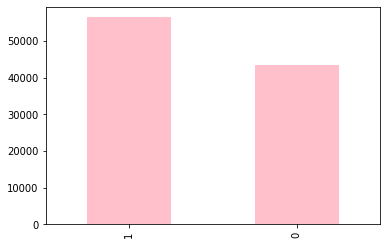

In [11]:
train['label'].value_counts().plot.bar(color = 'pink', figsize = (6, 4))

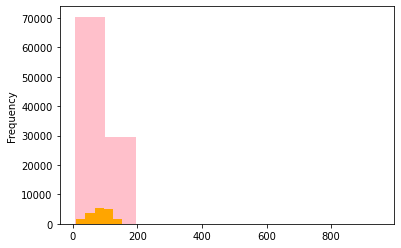

In [12]:
# checking the distribution of tweets in the data

length_train = train['tweet'].str.len().plot.hist(color = 'pink', figsize = (6, 4))
length_test = test['tweet'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

In [13]:
# adding a column to represent the length of the tweet

train['len'] = train['tweet'].str.len()
test['len'] = test['tweet'].str.len()

train.head(10)

,id,label,tweet,len
0,1,0,is so sad for my APL frie...,61
1,2,0,I missed the New Moon trail...,51
2,3,1,omg its already 7:30 :O,37
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,132
4,5,0,i think mi bf is cheating on me!!! ...,53
5,6,0,or i just worry too much?,42
6,7,1,Juuuuuuuuuuuuuuuuussssst Chillin!!,41
7,8,0,Sunny Again Work Tomorrow :-| ...,61
8,9,1,handed in my uniform today . i miss you ...,53
9,10,1,hmmmm.... i wonder how she my number @-),46


In [14]:

train.groupby('label').describe()

id                                   ...   len                    
         count          mean           std  min  ...   25%   50%    75%    max
label                                            ...                          
0      43531.0  47384.959362  29753.713102  1.0  ...  48.0  75.0  110.0  949.0
1      56457.0  52026.250775  27994.983763  3.0  ...  46.0  72.0  106.0  188.0

[2 rows x 16 columns]

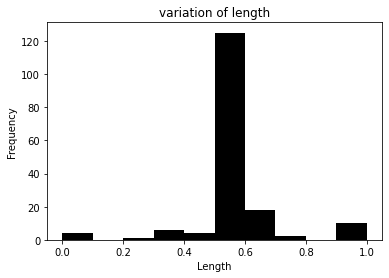

In [15]:
train.groupby('len').mean()['label'].plot.hist(color = 'black', figsize = (6, 4),)
plt.title('variation of length')
plt.xlabel('Length')
plt.show()

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

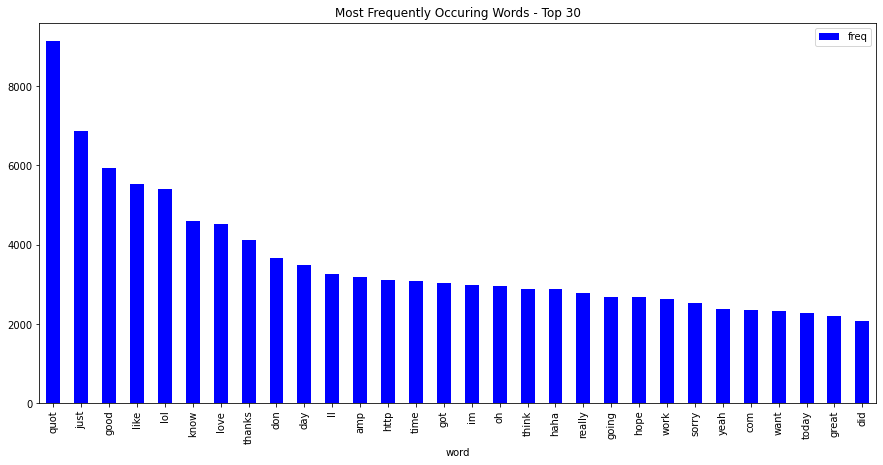

In [16]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train.tweet)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")


Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

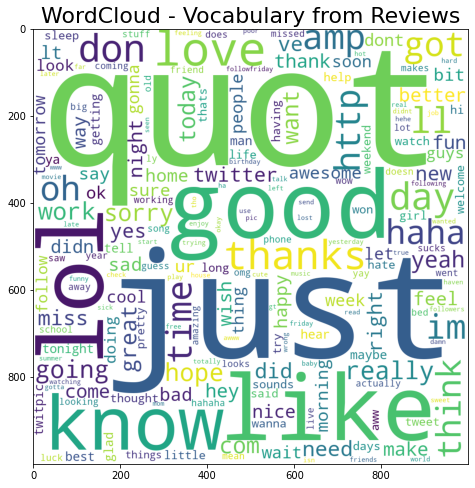

In [17]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

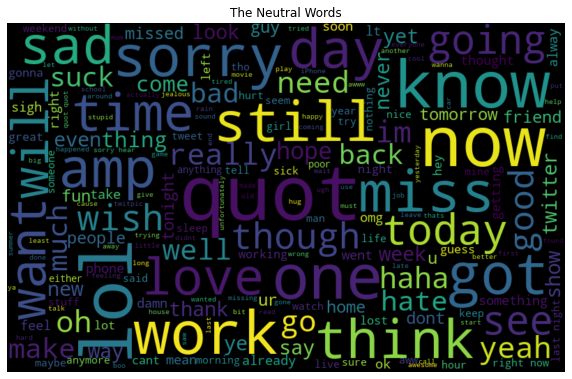

In [18]:
normal_words =' '.join([text for text in train['tweet'][train['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()


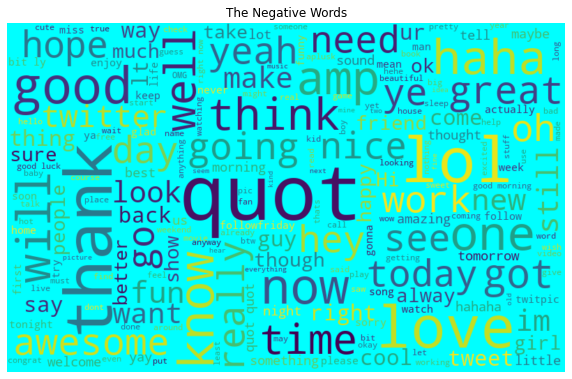

In [19]:
negative_words =' '.join([text for text in train['tweet'][train['label'] == 1]])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()


In [20]:
# tokenizing the words present in the training set
tokenized_tweet = train['tweet'].apply(lambda x: x.split()) 

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train['tweet']), epochs=20)

(19727867, 26601100)

In [21]:
model_w2v.wv.most_similar(positive = "dinner")

[('roast', 0.5323243141174316),
 ('Delicious', 0.49964001774787903),
 ('chilli', 0.4902200698852539),
 ('changs', 0.4797445237636566),
 ('snack,', 0.4797116219997406),
 ('Mmmm...', 0.47765666246414185),
 ('#dreams', 0.47611090540885925),
 ('ranch', 0.4686848521232605),
 ('two!!', 0.46758103370666504),
 ('njoy', 0.46718931198120117)]

In [22]:
model_w2v.wv.most_similar(positive = "cancer")

[('62.', 0.6543084383010864),
 ('lots.', 0.6351165175437927),
 ('cervical', 0.6330438852310181),
 ('now!!!!!', 0.5720689296722412),
 ('Fawcett', 0.5602539777755737),
 ('#Farrah', 0.5592739582061768),
 ('http://www.cnn.com/2009/SHOWBIZ/TV/06/25/obit.fawcett/index.html',
  0.558070182800293),
 ('contribution', 0.5508794784545898),
 ('funeral', 0.5492823123931885),
 ('species', 0.5473557710647583)]

In [23]:
model_w2v.wv.most_similar(positive = "apple")

[('Bluetooth', 0.5664305686950684),
 ('kiwi', 0.565908670425415),
 ('cookie,', 0.5511870384216309),
 ('toffee', 0.5123206973075867),
 ('tart', 0.49884912371635437),
 ('*shares*', 0.4941774904727936),
 ('@CBrooker', 0.49230197072029114),
 ('polaroids', 0.48822423815727234),
 ('bagel', 0.48798874020576477),
 ('frankenstein', 0.48753947019577026)]

In [24]:
model_w2v.wv.most_similar(negative = "hate")

[('*whew*', 0.11148029565811157),
 ('#examen09', -0.021402843296527863),
 ('@chenriquee', -0.022600391879677773),
 ('thankee.', -0.05810115858912468),
 ('No,', -0.06616505235433578),
 ('Oh,', -0.07270961999893188),
 ('agree', -0.0742262452840805),
 ('Oh.', -0.0789715051651001),
 ('Aw', -0.08125810325145721),
 ('Haha.', -0.08498098701238632)]